Using long short term memory(LSTM) to predict the closing stock price of a corporation (Apple Inc.) using 60 day stock price.

In [8]:
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
# # get the stcok quote
# df = web.DataReader('aapl', data_source='yahoo',start = '2012-01-01', end ='2019-12-17')
# # show the data
# df
num_of_day = 30

In [10]:
table = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1325390400&period2=1656734399&interval=1d&events=history&includeAdjustedClose=true")
pd.to_datetime(table['Date'])
table = table.set_index('Date')
# print(result)
print(table)
table.info()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.557465   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.624951   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.765112   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.898557   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.878098   
...                ...         ...         ...         ...         ...   
2022-06-27  142.699997  143.490005  140.970001  141.660004  141.660004   
2022-06-28  142.130005  143.419998  137.320007  137.440002  137.440002   
2022-06-29  137.460007  140.669998  136.669998  139.229996  139.229996   
2022-06-30  137.250000  138.369995  133.770004  136.720001  136.720001   
2022-07-01  136.039993  139.039993  135.660004  138.929993  138.929993   

               Volume  
Date         

In [11]:
table.shape

(2642, 6)

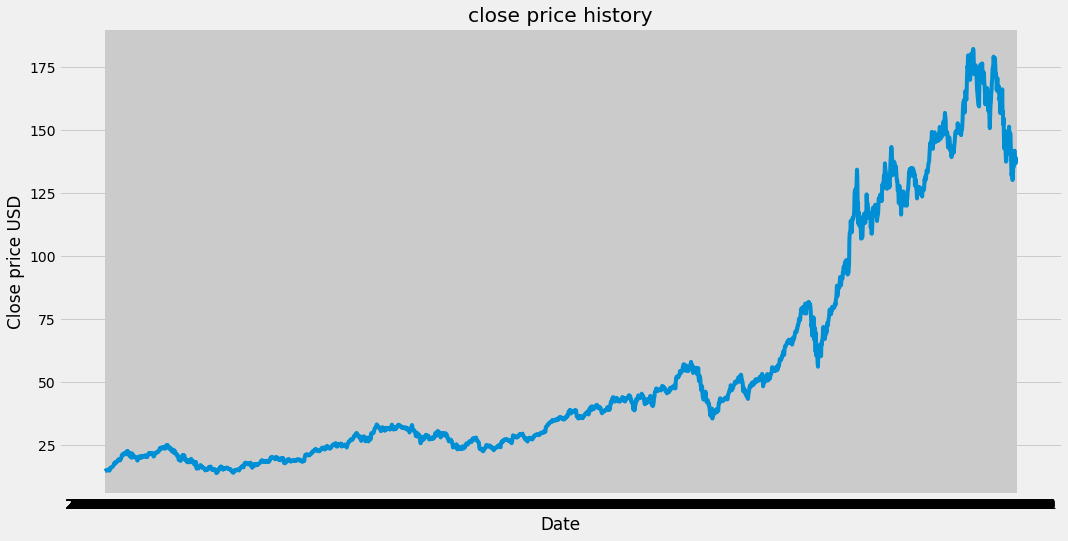

In [12]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(table['Close'])
plt.xlabel('Date')
plt.ylabel('Close price USD')
plt.show()

In [13]:
# new data frame with only the 'close'
data = table.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# the number of rows to train the model
traning_data_len = math.ceil(len(dataset)*0.8)

traning_data_len

2114

In [14]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439888],
       [0.00486851],
       [0.00584392],
       ...,
       [0.74545184],
       [0.73051695],
       [0.74366677]])